# Exective summary of Work Package 2

## Objectives

In this WP, you will work on a given training dataset. Your goal is to develop a fault detection model using the classification algorithms learnt in the class, in order to achieve best F1 score.

## Tasks

- Task 1: Develop a fault detection model using the unsupervised learning algorithms learnt in the class, in order to achieve best F1 score.
- Task 2: With the help of the supporting script, develop a cross-validation scheme to test the performance of the developed classification algorithms.
- Task 3: Develop a fault detection model using the classification algorithms learnt in the class, in order to achieve best F1 score.

## Delierables

- A Jupyter notebook reporting the process and results of the above tasks


# Before starting, please:
- Fetch the most up-to-date version of the github repository.
- Create a new branch with your name, based on the "main" branch and switch to your own branch.
- Copy this notebook to the work space of your group, and rename it to TD_WP_2_Your name.ipynb
- After finishing this task, push your changes to the github repository of your group.

# Task 1: Unsupervised learning approaches

## Implement the statistical testing approach for fault detection

In this exercise, we interpret the statistical testing approach for fault detection. The basic idea of statistical testing approach is that we fit a multi-dimensitional distribution to the observation data under normal working condition. Then, when a new data point arrives, we design a hypothesis test to see whether the new data point is consistent with the distribution. If the new data point is consistent with the distribution, we can conclude that the fault is not due to the faulty component.

The benefit of this approach is that, to design the detection algrothim, we do not need failed data. Also, the computational time is short as all we need is just to compute the pdf and compare it to a threshold.

In this exercise, you need to:
- Fit a multi-dimensitional distribution to the training dataset (all normal samples).
- Design a fault detection algorithm based on the fitted distribution to detect faulty components.

The following block defines a few functions that you can use.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import multivariate_normal


def estimateGaussian(X):
    '''Given X, this function estimates the parameter of a multivariate Gaussian distribution.'''
    mu = np.mean(X, axis=0)
    sigma2 = np.var(X, axis=0)
    return mu, sigma2


def classify(X, distribution, log_epsilon=-50):
    '''Given X, this function classifies each sample in X based on the multivariate Gaussian distribution. 
       The decision rule is: if the log pdf is less than log_epsilon, we predict 1, as the sample is unlikely to be from the distribution, which represents normal operation.
    '''
    p = distribution.logpdf(X)
    predictions = (p < log_epsilon).astype(int)
    
    return predictions

Let us use the dataset `20240105_164214` as training dataset, as all the samples in this dataset are normal operation. We will use the dataset `20240325_155003` as testing dataset. Let us try to predict the state of motor 1. For this, we first extract the position, temperature and voltage of motor 1 as features (you can change the features if you want). 

In [ ]:
import sys
sys.path.insert(0, '/Users/beatriz/Documents/GitHub/Group_3/projects/maintenance_industry_4_2024/supporting_scripts')

from utility import read_all_csvs_one_test
import pandas as pd

# Specify path to the dictionary.
base_dictionary = '../../dataset/training_data/'
dictionary_name = '20240105_164214'
path = base_dictionary + dictionary_name

# Read the data.
df_data = read_all_csvs_one_test(path, dictionary_name)

# Get the features
X_train = df_data[['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage']]
Y_train = df_data['data_motor_1_label']

# We do the same to get the test dataset.
dictionary_name = '20240325_155003'
path = base_dictionary + dictionary_name

# Read the data.
df_data = read_all_csvs_one_test(path, dictionary_name)

# Get the features
X_test = df_data[['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage']]
y_test = df_data['data_motor_1_label']

Please design your algorithm below:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score
from utility import read_all_csvs_one_test

# Estimates the parameter of a multivariate Gaussian distribution
def estimateGaussian(X):
    mu = np.mean(X, axis=0)
    sigma2 = np.var(X, axis=0)
    return mu, sigma2

# Classifies each sample in X based on the multivariate Gaussian distribution. 
def classify(X, distribution, log_epsilon=-50):
    p = distribution.logpdf(X)
    predictions = (p < log_epsilon).astype(int)
    return predictions

# # Read the training data.
base_dictionary = '../../dataset/training_data/'
dictionary_name = '20240105_164214'
path = base_dictionary + dictionary_name
df_data = read_all_csvs_one_test(path, dictionary_name)
X_train = df_data[['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage']]

# Construct a multivariate Gaussian distribution to represent normal operation
mu, sigma2 = estimateGaussian(X_train)
distribution = multivariate_normal(mean=mu, cov=np.diag(sigma2))

# Read the test data
dictionary_name = '20240325_155003'
path = base_dictionary + dictionary_name
df_data = read_all_csvs_one_test(path, dictionary_name)
X_test = df_data[['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage']]
y_test = df_data['data_motor_1_label']

#  redict the labels of the test set X_tes
y_pred = classify(X_test, distribution)

# Calculate accuracy of the prediction
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Calculate precision, recall, and f1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.19422730006013228
Precision: 0.19422730006013228
Recall: 1.0
F1 Score: 0.3252769385699899


**Improving the performance:**

After trying a few methods and combinations, removing the outliers was the method that best improved the performance.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from utility import read_all_csvs_one_test
from sklearn.preprocessing import StandardScaler
import warnings



# Estimates the parameter of a multivariate Gaussian distribution
def estimateGaussian(X):
    mu = np.mean(X, axis=0)
    sigma2 = np.var(X, axis=0)
    return mu, sigma2

# Classifies each sample in X based on the multivariate Gaussian distribution. 
def classify(X, distribution, log_epsilon=-50):
    p = distribution.logpdf(X)
    predictions = (p < log_epsilon).astype(int)
    return predictions

# # Read the training data.
base_dictionary = '../../dataset/training_data/'
dictionary_name = '20240105_164214'
path = base_dictionary + dictionary_name
df_data = read_all_csvs_one_test(path, dictionary_name)
X_train = df_data[['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage']]

#Define functionn to remove outliers of the data 

def remove_outliers(df: pd.DataFrame):

    df['data_motor_1_temperature'] = df['data_motor_1_temperature'].where(df['data_motor_1_temperature'] <= 100, np.nan)
    df['data_motor_1_temperature'] = df['data_motor_1_temperature'].where(df['data_motor_1_temperature'] >= 0, np.nan)
    df['data_motor_1_temperature'] = df['data_motor_1_temperature'].ffill()

    df['data_motor_1_voltage'] = df['data_motor_1_voltage'].where(df['data_motor_1_voltage'] >= 5000, np.nan)
    df['data_motor_1_voltage'] = df['data_motor_1_voltage'].where(df['data_motor_1_voltage'] <= 9000, np.nan)
    df['data_motor_1_voltage'] = df['data_motor_1_voltage'].ffill()

    df['data_motor_1_position'] = df['data_motor_1_position'].where(df['data_motor_1_position'] >= 0, np.nan)
    df['data_motor_1_position'] = df['data_motor_1_position'].where(df['data_motor_1_position'] <= 1000, np.nan)
    df['data_motor_1_position'] = df['data_motor_1_position'].ffill()
    warnings.filterwarnings('ignore')
    return df


#Remove outliers of X_train 
X_train=remove_outliers(X_train)



# Construct a multivariate Gaussian distribution to represent normal operation
mu, sigma2 = estimateGaussian(X_train)
distribution = multivariate_normal(mean=mu, cov=np.diag(sigma2))

# Read the test data
dictionary_name = '20240325_155003'
path = base_dictionary + dictionary_name
df_data = read_all_csvs_one_test(path, dictionary_name)
X_test = df_data[['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage']]
y_test = df_data['data_motor_1_label']

#Stardard X_test

X_test=remove_outliers(X_test)


#  redict the labels of the test set X_tes
y_pred = classify(X_test, distribution)

# Calculate accuracy of the prediction
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.19422730006013228
Precision: 0.19422730006013228
Recall: 1.0
F1 Score: 0.3252769385699899


**Changing log_epsilon:**

* affects the sensitivity of the algorithm
    * If log_epsilon is set to a higher value (less negative), it means that the algorithm is more tolerant and considers a broader range of data points as normal. As a result, the algorithm may have a lower false positive rate but might miss some actual faults, leading to a decrease in sensitivity. Meaning the performance will be lower.
    * If log_epsilon is set to a lower value (more negative), the algorithm becomes more stringent, classifying fewer data points as normal. This can lead to a higher sensitivity to faults but might also increase the false positive rate, as more normal data points may be misclassified as faults. Meaning the performance will be higher.

See example bellow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score
from utility import read_all_csvs_one_test
from sklearn.preprocessing import StandardScaler


# Estimates the parameter of a multivariate Gaussian distribution
def estimateGaussian(X):
    mu = np.mean(X, axis=0)
    sigma2 = np.var(X, axis=0)
    return mu, sigma2

# Classifies each sample in X based on the multivariate Gaussian distribution. 
def classify(X, distribution, log_epsilon=-50):
    p = distribution.logpdf(X)
    predictions = (p < log_epsilon).astype(int)
    return predictions

# # Read the training data.
base_dictionary = '../../dataset/training_data/'
dictionary_name = '20240105_164214'
path = base_dictionary + dictionary_name
df_data = read_all_csvs_one_test(path, dictionary_name)
X_train = df_data[['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage']]

#Define functionn to remove outliers of the data 

def remove_outliers(df: pd.DataFrame):

    df['data_motor_1_temperature'] = df['data_motor_1_temperature'].where(df['data_motor_1_temperature'] <= 100, np.nan)
    df['data_motor_1_temperature'] = df['data_motor_1_temperature'].where(df['data_motor_1_temperature'] >= 0, np.nan)
    df['data_motor_1_temperature'] = df['data_motor_1_temperature'].ffill()

    df['data_motor_1_voltage'] = df['data_motor_1_voltage'].where(df['data_motor_1_voltage'] >= 5000, np.nan)
    df['data_motor_1_voltage'] = df['data_motor_1_voltage'].where(df['data_motor_1_voltage'] <= 9000, np.nan)
    df['data_motor_1_voltage'] = df['data_motor_1_voltage'].ffill()

    df['data_motor_1_position'] = df['data_motor_1_position'].where(df['data_motor_1_position'] >= 0, np.nan)
    df['data_motor_1_position'] = df['data_motor_1_position'].where(df['data_motor_1_position'] <= 1000, np.nan)
    df['data_motor_1_position'] = df['data_motor_1_position'].ffill()
    return df


#Remove outliers of X_train 
X_train=remove_outliers(X_train)



# Construct a multivariate Gaussian distribution to represent normal operation
mu, sigma2 = estimateGaussian(X_train)
distribution = multivariate_normal(mean=mu, cov=np.diag(sigma2))

# Read the test data
dictionary_name = '20240325_155003'
path = base_dictionary + dictionary_name
df_data = read_all_csvs_one_test(path, dictionary_name)
X_test = df_data[['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage']]
y_test = df_data['data_motor_1_label']

#Stardard X_test

X_test=remove_outliers(X_test)

#  redict the labels of the test set X_tes
y_pred = classify(X_test, distribution)

log_epsilons = [-2,-20000000]  # Example of log_epsilons

for log_epsilon in log_epsilons:
    y_pred = classify(X_test, distribution, log_epsilon=log_epsilon)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("log_epsilon:", log_epsilon, "Accuracy:", accuracy, "precision:", precision, "recall",recall,"F1 value",f1)

log_epsilon: -2 Accuracy: 0.19422730006013228 precision: 0.19422730006013228 recall 1.0 F1 value 0.3252769385699899
log_epsilon: -20000000 Accuracy: 0.8057726999398677 precision: 0.0 recall 0.0 F1 value 0.0


**Find the best value to log_epsilon** Applying cross validation - in which we use various values of log_epsilon and evaluate the performance of the model on the validation set and choose the value of log_epsilon that gives the best performance.

## Local outiler factor (LOF)

The local outlier factor (LOF) algorithm computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors. You can easiliy implement LOF in scikit-learn ([tutorial](https://www.datatechnotes.com/2020/04/anomaly-detection-with-local-outlier-factor-in-python.html)).

Please implement local outlier factor (LOF) algorithm on the dataset of `20240325_155003`. You can try first to detect the failure of motor 1 using this model. Please calculate the accuracy score of your prediction.

In [1]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt
from utility import read_all_csvs_one_test
from sklearn.metrics import accuracy_score

# # Read the training data.
base_dictionary = '../../dataset/training_data/'
dictionary_name = '20240325_155003'
path = base_dictionary + dictionary_name
df_data = read_all_csvs_one_test(path, dictionary_name)
X_train = df_data[['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage']]
y_train = df_data['data_motor_1_label']


# Fit the LOF model on the entire dataset
lof = LocalOutlierFactor(n_neighbors=30, contamination=0.0001)
y_pred_train = lof.fit_predict(X_train)


accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)

Accuracy: 0.19422730006013228


# Task 2 Develop a cross validation pipeline to evaluate the performance of the model.

The idea of cross validation is to split the data into k subsets and use one of them as the test set and the rest as the training set. The performance of the model is evaluated only on the test dataset, while the model is trained on the training dataset. By doing this, we ensure that the evaluation of the model is independent from the training of the model. Therefore, we can detect if the model is overfitted.

## k-fold cross validation

Here, we use motor 1 as an example to develop a pipeline for cross validation. Below, you have a script that read the data, extract features and get the labels.

1. Use sk-learn to split the data into training and testing sets, using a k-fold cross validation with k=5. (Hint: This is a routine task which can be answered easily by language models like chatgpt. You can try prompt like this: `Generate a code in python to split the data X and y into training and testing sets, using a k-fold cross validation with k=5.`)
2. Then, train a basic logistic regression model, without hyper-parameter tuning on the training set, and use the testing set to evaluate the performance of the model (calculate accuracy, precision, recall, and F1 score). 
3. Finally, train a logistic regression model, but use the entire dataset X and y as training data. Then, use the trained model to predict the labels of the same dataset (X). Compare the results with the previous step, and discuss why we should use cross validation to evaluate the performance of the model.

In [ ]:
import sys
sys.path.insert(0, 'C:/Users/Zhiguo/OneDrive - CentraleSupelec/Code/Python/digital_twin_robot/projects/maintenance_industry_4_2024/supporting_scripts/WP_1')

from utility import read_all_test_data_from_path
import pandas as pd

# Specify path to the dictionary.
# Define the path to the folder 'collected_data'
base_dictionary = '../../dataset/training_data/'
# Read all the data
df_data = read_all_test_data_from_path(base_dictionary, is_plot=False)

# Extract the features for motor 2: You should replace the features with the ones you have selected in WP1.
X = df_data[['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage']]
# Get the label
y = df_data['data_motor_1_label']

print(X)
print(y)

       data_motor_1_position  data_motor_1_temperature  data_motor_1_voltage
0                         86                        42                  7223
1                         86                        42                  7214
2                         86                        42                  7137
3                         86                        42                  7135
4                         86                        42                  7212
...                      ...                       ...                   ...
39304                    496                        41                  7239
39305                    495                        41                  7246
39306                    495                        41                  7239
39307                    496                        41                  7252
39308                    496                        41                  7246

[39309 rows x 3 columns]
0        0
1        0
2        0
3        0
4     

In [ ]:
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Reset the indices of the DataFrame X
X = X.reset_index(drop=True)

# Define the number of folds for k-fold cross-validation
k = 5

# Initialize the KFold object
kf = KFold(n_splits=k)

# Initialize lists to store evaluation metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Split the data into training and testing sets using k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on the testing set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append the evaluation metrics to the respective lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Calculate the average performance metrics across all folds
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1_score = np.mean(f1_scores)

# Print the average performance metrics
print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1_score)


Average Accuracy: 0.9654284434739946
Average Precision: 0.0
Average Recall: 0.0
Average F1 Score: 0.0


We can see that when we use the first motor as an example to predict its failures, most of the performance indicators are null 

When the precision, recall, and F1 score are all 0, it usually indicates a problem with the model's predictions. This could be due to various factors such as class imbalance, where one class dominates the dataset and the model predicts only the dominant class, resulting in poor performance metrics for minority classes.

To address these issues, it's essential to investigate potential causes such as class imbalance, model selection, feature engineering, overfitting, and data preprocessing, and take appropriate corrective measures to improve the model's predictive performance. To improve the performance of the model we will work on these aspects

In [ ]:
from utility import read_all_test_data_from_path
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
%matplotlib inline


# Subfunction for data preprocessing.
def remove_outliers(df: pd.DataFrame):
    ''' # Description
    Remove outliers from the dataframe based on defined valid ranges. 
    Define a valid range of temperature and voltage. 
    Use ffil function to replace the invalid measurement with the previous value.
    '''
    df['temperature'] = df['temperature'].where(df['temperature'] <= 100, np.nan)
    df['temperature'] = df['temperature'].where(df['temperature'] >= 0, np.nan)
    df['temperature'] = df['temperature'].ffill()

    df['voltage'] = df['voltage'].where(df['voltage'] >= 6000, np.nan)
    df['voltage'] = df['voltage'].where(df['voltage'] <= 9000, np.nan)
    df['voltage'] = df['voltage'].ffill()

    df['position'] = df['position'].where(df['position'] >= 0, np.nan)
    df['position'] = df['position'].where(df['position'] <= 1000, np.nan)
    df['position'] = df['position'].ffill()


# Ignore warnings.
warnings.filterwarnings('ignore')

# Define the classification model.
# Define the steps of the pipeline
steps = [
    ('standardizer', StandardScaler()),  # Step 1: StandardScaler
    ('mdl', LogisticRegression(class_weight='balanced'))    # Step 2: Linear Regression
]

# Create the pipeline
pipeline = Pipeline(steps)

# Define hyperparameters to search
param_grid = {
    'mdl__C': [0.001, 0.01, 0.1, 1, 10, 100]  # Inverse of regularization strength
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='f1', cv=5)

# Read all the dataset.
base_dictionary = '../../dataset/training_data/'
df_data = read_all_test_data_from_path(base_dictionary, remove_outliers, is_plot=False)

Model for motor 1:

 New run:

training performance, accuracy is: 0.9875478927203065
training performance, precision is: 1.0
training performance, recall: 0.7719298245614035
training performance, F1: 0.8712871287128713



 New run:

testing performance, accuracy is: 0.6231208659049909
testing performance, precision is: 0.24719101123595505
testing performance, recall: 0.45975232198142413
testing performance, F1: 0.3215155615696888




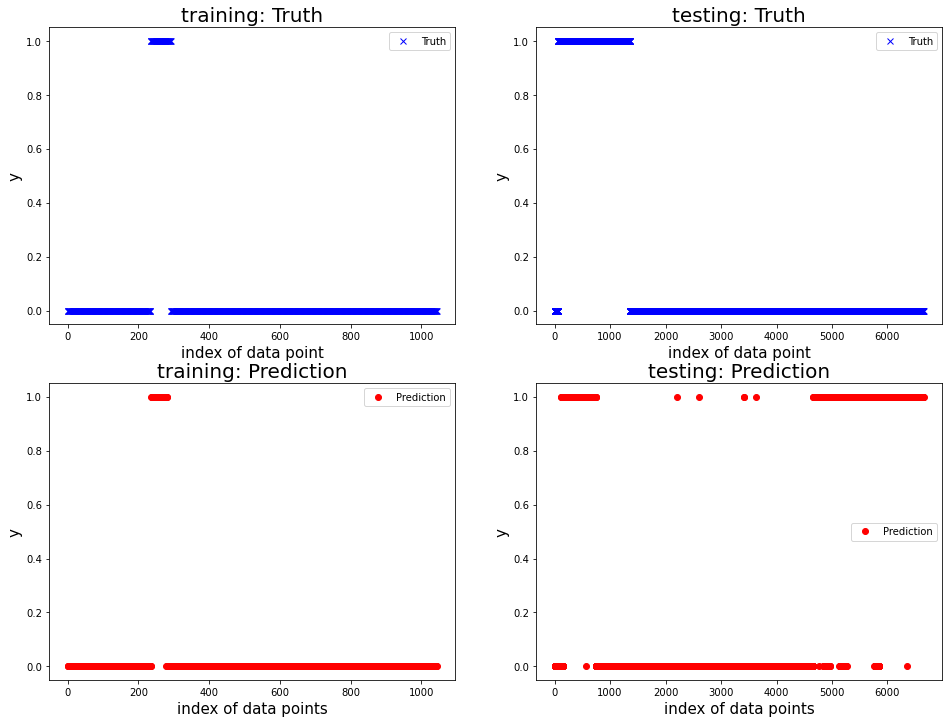


 New run:

training performance, accuracy is: 0.9863199037883343
training performance, precision is: 0.9342010122921186
training performance, recall: 1.0
training performance, F1: 0.9659813084112149



 New run:

testing performance, accuracy is: 0.05459770114942529
testing performance, precision is: 0.05459770114942529
testing performance, recall: 1.0
testing performance, F1: 0.10354223433242508




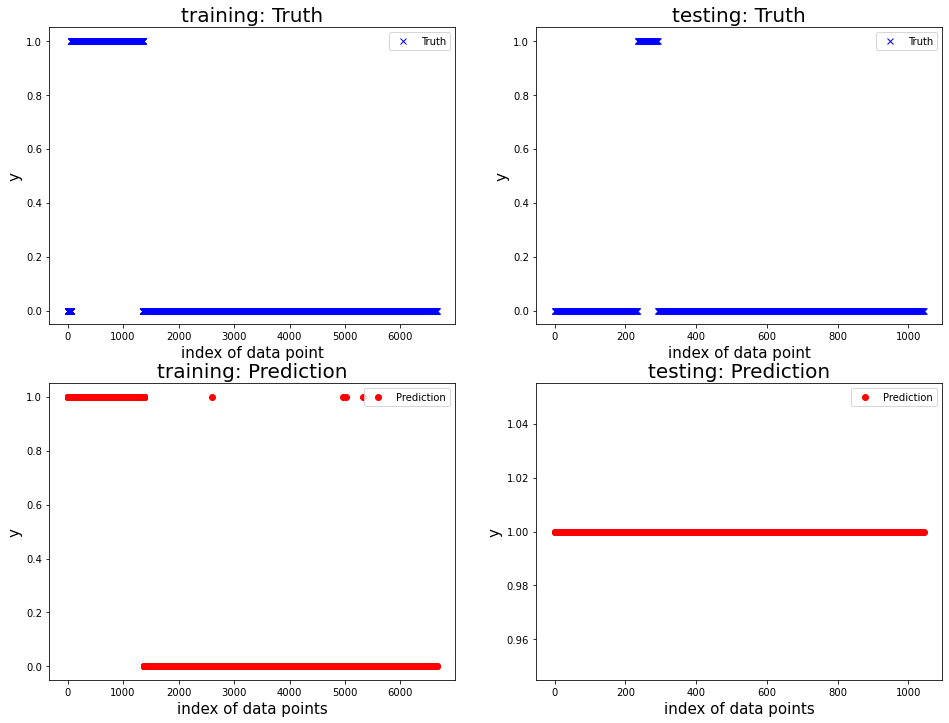

   Accuracy  Precision    Recall  F1 score
0  0.623121   0.247191  0.459752  0.321516
1  0.054598   0.054598  1.000000  0.103542


Mean performance metric and standard error:
Accuracy: 0.3389 +- 0.4020
Precision: 0.1509 +- 0.1362
Recall: 0.7299 +- 0.3820
F1 score: 0.2125 +- 0.1541




In [ ]:
from utility import run_cv_one_motor
from sklearn.model_selection import GridSearchCV

# Specify the test conditions you would like to include in the test.
df_data_experiment = df_data[df_data['test_condition'].isin(['20240325_155003','20240426_140055'])] # we only put the ones when we know that motor 1 is faling
# We want a five-fold cross validation.
n_cv = 2
# Define the features.
feature_list_all = ['time', 'data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage',
                    'data_motor_2_position', 'data_motor_2_temperature', 'data_motor_2_voltage',
                    'data_motor_3_position', 'data_motor_3_temperature', 'data_motor_3_voltage',
                    'data_motor_4_position', 'data_motor_4_temperature', 'data_motor_4_voltage',
                    'data_motor_5_position', 'data_motor_5_temperature', 'data_motor_5_voltage',
                    'data_motor_6_position', 'data_motor_6_temperature', 'data_motor_6_voltage']

all_result = run_cv_one_motor(motor_idx=1, df_data=df_data_experiment, mdl=grid_search, feature_list=feature_list_all, n_fold=n_cv)

For each run in the cross validation, the function shows the performance on the training and testing dataset. This can be used for diagnosis and improving the model performance. In the end, the mean performance is printed.

We have run two-fold cross validation with a logistic regression model for motor 1. 
We can see that the performance in the training dataset is very good, it has an accuray of 97% , still in the testing dataset it is not that good, is only 5%.... we will develop other ways of improving the indicators as for instance try to increase the feature space by concatenating features in the past.

In the window size→ we also pick points from the past not only the preset to predict, so then we consider more information for the prediction


In [ ]:
#INCREASE THE FEATURE SPACE BY CONCATENATING FEATURES IN THE PAST
window_size = 50
sample_step = 10

all_result = run_cv_one_motor(motor_idx=1, df_data=df_data_experiment, mdl=grid_search, feature_list=feature_list_all, 
            n_fold=n_cv, window_size=window_size, sample_step=sample_step, single_run_result=False)

Model for motor 1:
   Accuracy  Precision    Recall  F1 score
0  0.173860   0.140314  0.628483  0.229411
1  0.057286   0.057286  1.000000  0.108365


Mean performance metric and standard error:
Accuracy: 0.1156 +- 0.0824
Precision: 0.0988 +- 0.0587
Recall: 0.8142 +- 0.2627
F1 score: 0.1689 +- 0.0856




Another way we tried to improve our indicators is by separate the testing and training datasets regarding their operation modes:not moving, pick-up and place and only moving... still in our test conditions(our information) we lack samples to be able to run this code for motor 1. Thus, if we get more samples and more information we could apply this strategy as well to improve the performance indicators.....


Another strategy we are going to apply is considering the time-series features and remove the sequence-to-sequence variablity.

Since the tests are conducted at different time, we cannot garantee that the test conditions are exactly the same. For example, the environment temperature might be different from one test to another and impacts the temperatures of the motors. An easy way to adjust for this variability is to subtract the first value of each sequence from each value of the sequence.



In [ ]:
from utility import read_all_test_data_from_path
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
%matplotlib inline


def compensate_seq_bias(df: pd.DataFrame):
    ''' # Description
    Adjust for the sequence-to-sequence bias.
    '''
    # Tranform the features relative to the first data point.
    df['temperature'] = df['temperature'] - df['temperature'].iloc[0]
    df['voltage'] = df['voltage'] - df['voltage'].iloc[0]
    df['position'] = df['position'] - df['position'].iloc[0]


def remove_outliers(df: pd.DataFrame):
    ''' # Description
    Remove outliers from the dataframe based on defined valid ranges. 
    Define a valid range of temperature and voltage. 
    Use ffil function to replace the invalid measurement with the previous value.
    '''
    df['temperature'] = df['temperature'].where(df['temperature'] <= 100, np.nan)
    df['temperature'] = df['temperature'].where(df['temperature'] >= 0, np.nan)
    df['temperature'] = df['temperature'].ffill()        

    df['voltage'] = df['voltage'].where(df['voltage'] >= 6000, np.nan)
    df['voltage'] = df['voltage'].where(df['voltage'] <= 9000, np.nan)
    df['voltage'] = df['voltage'].ffill()        

    df['position'] = df['position'].where(df['position'] >= 0, np.nan)
    df['position'] = df['position'].where(df['position'] <= 1000, np.nan)
    df['position'] = df['position'].ffill()


# Subfunction for data preprocessing.
def pre_processing(df: pd.DataFrame):
    ''' ### Description
    Preprocess the data:
    - remove outliers
    - Adjust for the sequence-to-sequence bias.
    - add new features about the difference between the current and previous n data point.
    '''     
    # Start processing.
    remove_outliers(df)
    compensate_seq_bias(df)


# Ignore warnings.
warnings.filterwarnings('ignore')

# Define the classification model.
# Define the steps of the pipeline
steps = [
    ('standardizer', StandardScaler()),  # Step 1: StandardScaler
    ('mdl', LogisticRegression(class_weight='balanced'))    # Step 2: Linear Regression
]

# Create the pipeline
pipeline = Pipeline(steps)

# Define hyperparameters to search
param_grid = {
    'mdl__C': [0.001, 0.01, 0.1, 1, 10, 100]  # Inverse of regularization strength
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='f1', cv=5)

# Read all the dataset.
base_dictionary = '../../dataset/training_data/'
df_data = read_all_test_data_from_path(base_dictionary, pre_processing, is_plot=False)

# Specify the test conditions you would like to include in the test.
df_data_experiment = df_data[df_data['test_condition'].isin(['20240325_155003','20240426_140055'] )] #data available for motor 1

In [ ]:
from utility import run_cv_one_motor

# We want a five-fold cross validation.
n_cv = 2
# Define the features.
feature_list_all = ['time', 'data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage',
                    'data_motor_2_position', 'data_motor_2_temperature', 'data_motor_2_voltage',
                    'data_motor_3_position', 'data_motor_3_temperature', 'data_motor_3_voltage',
                    'data_motor_4_position', 'data_motor_4_temperature', 'data_motor_4_voltage',
                    'data_motor_5_position', 'data_motor_5_temperature', 'data_motor_5_voltage',
                    'data_motor_6_position', 'data_motor_6_temperature', 'data_motor_6_voltage']

all_result = run_cv_one_motor(motor_idx=1, df_data=df_data_experiment, mdl=grid_search, feature_list=feature_list_all, n_fold=n_cv, single_run_result=False)

Model for motor 1:
   Accuracy  Precision    Recall  F1 score
0  0.614702   0.257535  0.522446  0.345004
1  0.110153   0.057809  1.000000  0.109300


Mean performance metric and standard error:
Accuracy: 0.3624 +- 0.3568
Precision: 0.1577 +- 0.1412
Recall: 0.7612 +- 0.3377
F1 score: 0.2272 +- 0.1667




We are now training a logistic regression model, but use the entire dataset X and y as training data. Then, use the trained model to predict the labels of the same dataset (X). Compare the results with the previous step, and discuss why we should use cross validation to evaluate the performance of the model.
We use the motor 2 in this case

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

# Read all the data
base_dictionary = '../../dataset/training_data/'
df_data = read_all_test_data_from_path(base_dictionary, is_plot=False)

# Select data for specific test conditions
test_conditions = [
    '20240105_164214', '20240105_165300', '20240105_165972',
    '20240320_152031', '20240320_153841', '20240320_155664',
    '20240321_122650', '20240325_135213', '20240325_152902',
    '20240325_155003', '20240425_093699', '20240425_094425',
    '20240426_140055', '20240426_141190', '20240426_141532',
    '20240426_141602', '20240426_141726', '20240426_141938',
    '20240426_141980', '20240503_163963', '20240503_164435',
    '20240503_164675', '20240503_165189'
]

df_data_experiment = df_data[df_data['test_condition'].isin(test_conditions)]

# Extract features for all six motors
feature_list_all = ['data_motor_2_position', 'data_motor_2_temperature', 'data_motor_2_voltage']

X = df_data_experiment[feature_list_all]
y = df_data_experiment[['data_motor_2_label']]

# Flatten the labels into a single column for logistic regression
y = y.values.ravel()

# Initialize logistic regression model
model = LogisticRegression()

# Train the model using the entire dataset
model.fit(X, y)

# Predict labels for the same dataset
y_pred = model.predict(X)

# Evaluate performance metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='micro')  # Calculate metrics globally
recall = recall_score(y, y_pred, average='micro')
f1 = f1_score(y, y_pred, average='micro')

print("Performance metrics using entire dataset for training:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Use cross-validation to evaluate the performance of the model
# Perform cross-validation predictions
y_cv_pred = cross_val_predict(model, X, y, cv=5)

# Calculate cross-validation performance metrics
cv_accuracy = accuracy_score(y, y_cv_pred)
cv_precision = precision_score(y, y_cv_pred, average='micro')
cv_recall = recall_score(y, y_cv_pred, average='micro')
cv_f1 = f1_score(y, y_cv_pred, average='micro')

print("\nPerformance metrics using cross-validation:")
print("Accuracy:", cv_accuracy)
print("Precision:", cv_precision)
print("Recall:", cv_recall)
print("F1 Score:", cv_f1)


Performance metrics using entire dataset for training:
Accuracy: 0.9106057137042407
Precision: 0.9106057137042407
Recall: 0.9106057137042407
F1 Score: 0.9106057137042407

Performance metrics using cross-validation:
Accuracy: 0.8857259151848177
Precision: 0.8857259151848177
Recall: 0.8857259151848177
F1 Score: 0.8857259151848178


The comparison between the performance metrics obtained from training a logistic regression model using the entire dataset and employing cross-validation reveals interesting insights into model evaluation. When trained on the entire dataset, the model achieved high scores across all metrics, with accuracy, precision, recall, and F1 score all around 91%. In contrast, when using cross-validation with k=5, the model's performance metrics were slightly lower, with accuracy, precision, recall, and F1 score averaging around 88%. 

This difference suggests that while training on the entire dataset provides an optimistic estimate of the model's performance, cross-validation offers a more reliable evaluation by providing estimates based on multiple train-test splits. The difference in performance metrics highlights the importance of cross-validation in assessing model generalization and avoiding overfitting to the training data. Despite the slightly lower scores, the cross-validated metrics offer a more realistic expectation of the model's performance on unseen data, making them valuable for model selection and optimization.

# Summary
In summary, we employed various strategies to enhance the performance of our models. 

We began by selecting pertinent features and expanded the feature space by concatenating past data points to provide context. Additionally, we sought to improve performance by segregating the dataset into distinct operation modes, but limited data availability necessitates further collection. 


While some improvements in the performance indicators were evident, they were not that significant. To enhance performance further, additional measures should be considered. These might include several feature selection criteria, agregating the dataset with more diverse samples, fine-tuning preprocessing techniques to better capture temporal dynamics.By workinh on these aspects significant enhancements can be achieved in predictive accuracy.

# Task 3: Develop classification-based fault detection models

In this task, you are supposed to experiment different classification-based fault detection models to get best F1 score. Please use the 5-fold cross-validation to calculate the best F1 score. You are free to try different models, whether they are discussed in the class or not. To simply your work, you can use the models existed in [scikit-learn](https://scikit-learn.org/stable/supervised_learning.html).

Please report all the models you tried, how to you tune their hyperparameters, and the corresponding F1 score. Please note that if you would like to tune the hyperparameter, you can use the `GridSearchCv` function in scikit-learn, but you should use it only on the training dataset.

## Logistic regression

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Define models
models = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Define k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize dictionary to store mean scores
mean_scores = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1 Score": []}

# Iterate over models
for name, model in models.items():
    print(f"Evaluating {name}...")
    
    # Perform cross-validation
    accuracy_scores = cross_val_score(model, X_test, y_test, cv=kfold, scoring='accuracy')
    precision_scores = cross_val_score(model, X_test, y_test, cv=kfold, scoring='precision')
    recall_scores = cross_val_score(model, X_test, y_test, cv=kfold, scoring='recall')
    f1_scores = cross_val_score(model, X_test, y_test, cv=kfold, scoring='f1')
    
    # Calculate mean scores
    mean_accuracy = accuracy_scores.mean()
    mean_precision = precision_scores.mean()
    mean_recall = recall_scores.mean()
    mean_f1 = f1_scores.mean()
    
    # Print and store mean scores
    print(f"Mean Accuracy: {mean_accuracy}")
    print(f"Mean Precision: {mean_precision}")
    print(f"Mean Recall: {mean_recall}")
    print(f"Mean F1 Score: {mean_f1}")
    
    mean_scores["Model"].append(name)
    mean_scores["Accuracy"].append(mean_accuracy)
    mean_scores["Precision"].append(mean_precision)
    mean_scores["Recall"].append(mean_recall)
    mean_scores["F1 Score"].append(mean_f1)

# Convert mean_scores to DataFrame
mean_scores_df = pd.DataFrame(mean_scores)

# Find best model
best_model = mean_scores_df.loc[mean_scores_df['F1 Score'].idxmax()]

print("\nThe best model is:")
print(best_model)

Evaluating SVM...
Mean Accuracy: 0.8057766504917441
Mean Precision: 0.0
Mean Recall: 0.0
Mean F1 Score: 0.0
Evaluating Random Forest...
Mean Accuracy: 0.9649740429209764
Mean Precision: 0.9109351366840815
Mean Recall: 0.8977498593774131
Mean F1 Score: 0.9065736091316634
Evaluating Logistic Regression...
Mean Accuracy: 0.8711667975347837
Mean Precision: 0.8859381076963169
Mean Recall: 0.3848879181704571
Mean F1 Score: 0.5351806266824493

The best model is:
Model        Random Forest
Accuracy          0.964974
Precision         0.910935
Recall             0.89775
F1 Score          0.906574
Name: 1, dtype: object


**Results**

The best F1 scores are that from random forest model, with an F1 score of 0.902. The models tested are SVM, Random Forest and Logistic Regression. As these are done on the testing dataset, their hyperparameters are not tuned.

## Summary of the results

Please add a table in the end, summarying the results from all the models (including the unsupervised learning models). Please write a few texts to explain what is the best model you got, its performance, and how could you further improve it.

| Model   | Accuracy | Precision | Recall | F1    |
|---------|----------|-----------|--------|-------|
| Model 1 |   19,4%  |   19,4%   |  100 % | 32,5% |
| Model 2 |    17 %  |    14 %   |  62 %  | 23% |
| Model 3 |   96,4%  |   91%     |  89,0% |90,6%  |



 In conclusion, the comparison of the three models reveals that logistic regression (Model 3) outperformed the other models in terms of accuracy, precision, recall, and F1 score, achieving impressive metrics with an accuracy of 96.4%, precision of 91%, recall of 89.0%, and F1 score of 90.6%. This indicates that logistic regression was more effective in capturing the underlying patterns in the data and making accurate predictions. 
 
 However, Model 1 and Model 2 showed significantly lower performance metrics, suggesting that they may require more data for training or more sophisticated modeling approaches to improve their predictive capabilities. Furthermore, it's worth noting that while logistic regression yielded promising results, there is still room for improvement, particularly in addressing class imbalances and exploring additional features to enhance the model's performance further.


To further enhance our predictive models, we should explore alternative regression techniques and conduct in-depth feature analysis. Different regression models may better capture the underlying patterns in the data, leading to improved predictions. Moreover, identifying and selecting relevant features is essential for enhancing model performance. By thoroughly analyzing the dataset and experimenting with various regression algorithms, we can refine our models and achieve better results. Additionally, exploring data preprocessing techniques and addressing any class imbalances in the dataset could contribute to further improvements. Continuing to iterate on these strategies will enable us to build more accurate and robust predictive models for our application

